In [2]:
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
dk = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", names = ["RI: refractive index",
 "Na: Sodium",
                                                                                                       "Mg: Magnesium",
                                                                                                       "Al: Aluminum",
                                                                                                       "Si: Silicon",
                                                                                                       "K: Potassium",
                                                                                                       "Ca: Calcium",
                                                                                                       "Ba: Barium",
                                                                                                       "Fe: Iron",
                                                                                                       "Type of glass: (class attribute)"])

print(dk.dtypes)

RI: refractive index                float64
Na: Sodium                          float64
Mg: Magnesium                       float64
Al: Aluminum                        float64
Si: Silicon                         float64
K: Potassium                        float64
Ca: Calcium                         float64
Ba: Barium                          float64
Fe: Iron                            float64
Type of glass: (class attribute)      int64
dtype: object


In [4]:
dk.head()

,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass: (class attribute)
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
dk.describe()

,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass: (class attribute)
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [16]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RI: refractive index              214 non-null    float64
 1   Na: Sodium                        214 non-null    float64
 2   Mg: Magnesium                     214 non-null    float64
 3   Al: Aluminum                      214 non-null    float64
 4   Si: Silicon                       214 non-null    float64
 5   K: Potassium                      214 non-null    float64
 6   Ca: Calcium                       214 non-null    float64
 7   Ba: Barium                        214 non-null    float64
 8   Fe: Iron                          214 non-null    float64
 9   Type of glass: (class attribute)  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [23]:
dk['RI: refractive index']=((dk['RI: refractive index']-dk['RI: refractive index'].min())/(dk['RI: refractive index'].max()-dk['RI: refractive index'].min()))
dk['Na: Sodium']=((dk['Na: Sodium']-dk['Na: Sodium'].min())/(dk['Na: Sodium'].max()-dk['Na: Sodium'].min()))
dk['Mg: Magnesium']=((dk['Mg: Magnesium']-dk['Mg: Magnesium'].min())/(dk['Mg: Magnesium'].max()-dk['Mg: Magnesium'].min()))
dk['Al: Aluminum']=((dk['Al: Aluminum']-dk['Al: Aluminum'].min())/(dk['Al: Aluminum'].max()-dk['Al: Aluminum'].min()))
dk['Si: Silicon']=((dk['Si: Silicon']-dk['Si: Silicon'].min())/(dk['Si: Silicon'].max()-dk['Si: Silicon'].min()))
dk['K: Potassium']=((dk['K: Potassium']-dk['K: Potassium'].min())/(dk['K: Potassium'].max()-dk['K: Potassium'].min()))
dk['Ca: Calcium']=((dk['Ca: Calcium']-dk['Ca: Calcium'].min())/(dk['Ca: Calcium'].max()-dk['Ca: Calcium'].min()))
dk['Ba: Barium']=((dk['Ba: Barium']-dk['Ba: Barium'].min())/(dk['Ba: Barium'].max()-dk['Ba: Barium'].min()))
dk['Fe: Iron']=((dk['Fe: Iron']-dk['Fe: Iron'].min())/(dk['Fe: Iron'].max()-dk['Fe: Iron'].min()))
dk.head(10)

,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass: (class attribute)
1,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.000000,1
2,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.000000,1
3,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.000000,1
4,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.000000,1
5,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.000000,1
6,0.211150,0.309774,0.804009,0.414330,0.564286,0.103060,0.245353,0.0,0.509804,1
7,0.275680,0.386466,0.801782,0.264798,0.585714,0.093398,0.254647,0.0,0.000000,1
8,0.281387,0.363910,0.804009,0.236760,0.612500,0.091787,0.261152,0.0,0.000000,1
9,0.352502,0.497744,0.797327,0.336449,0.405357,0.090177,0.266729,0.0,0.000000,1
10,0.280948,0.341353,0.801782,0.333333,0.567857,0.091787,0.276022,0.0,0.215686,1


In [22]:
dk.describe()

,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass: (class attribute)
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.316744,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783,2.780374
std,0.133313,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056,2.103739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.235843,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000,1.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000,2.000000
75%,0.351514,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


<AxesSubplot:>

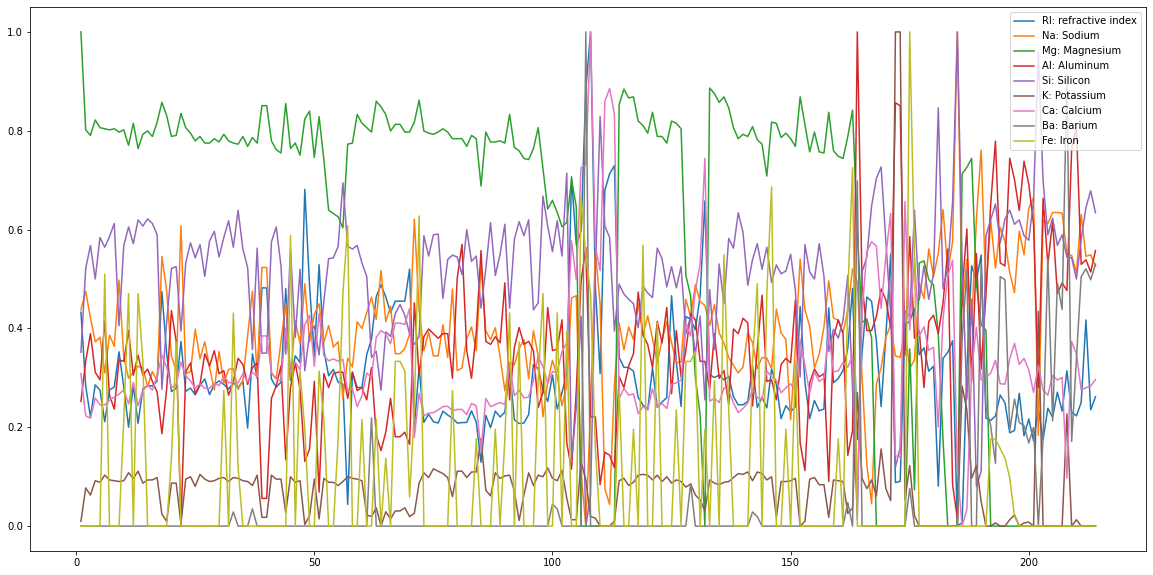

In [24]:
dk_viz = dk[["RI: refractive index",
 "Na: Sodium",
                                                                                                       "Mg: Magnesium",
                                                                                                       "Al: Aluminum",
                                                                                                       "Si: Silicon",
                                                                                                       "K: Potassium",
                                                                                                       "Ca: Calcium",
                                                                                                       "Ba: Barium",
                                                                                                       "Fe: Iron"]]
dk_viz.plot(figsize=(20,10))

In [28]:
print(dk["Type of glass: (class attribute)"].value_counts())

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass: (class attribute), dtype: int64


array([[<AxesSubplot:title={'center':'RI: refractive index'}>,
        <AxesSubplot:title={'center':'Na: Sodium'}>,
        <AxesSubplot:title={'center':'Mg: Magnesium'}>],
       [<AxesSubplot:title={'center':'Al: Aluminum'}>,
        <AxesSubplot:title={'center':'Si: Silicon'}>,
        <AxesSubplot:title={'center':'K: Potassium'}>],
       [<AxesSubplot:title={'center':'Ca: Calcium'}>,
        <AxesSubplot:title={'center':'Ba: Barium'}>,
        <AxesSubplot:title={'center':'Fe: Iron'}>],
       [<AxesSubplot:title={'center':'Type of glass: (class attribute)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

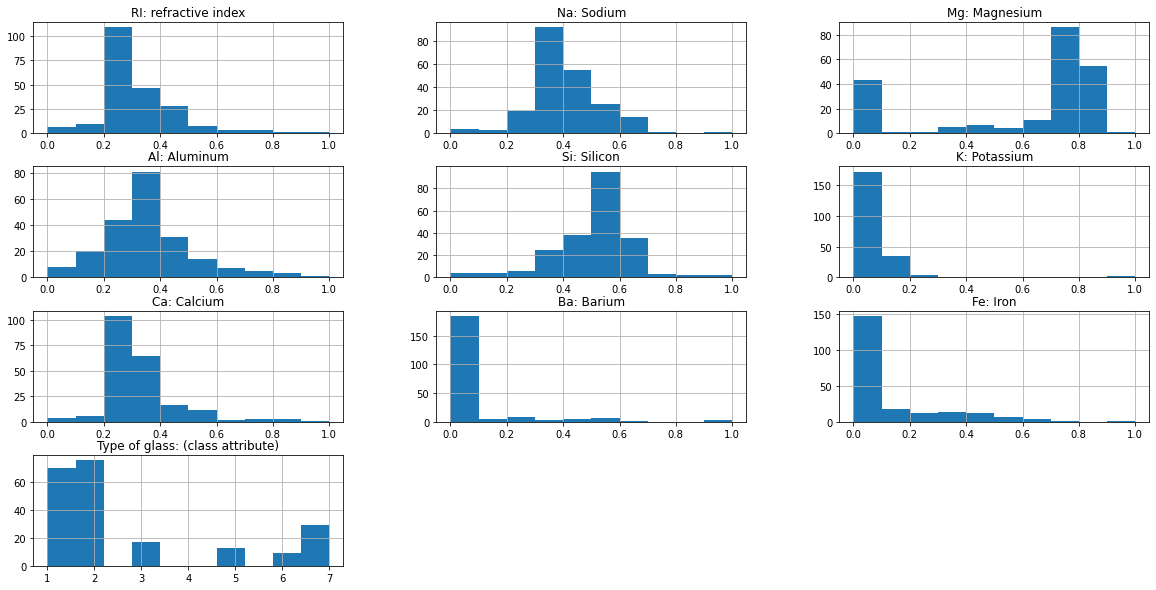

In [25]:
dk.hist(figsize=(20,10))

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


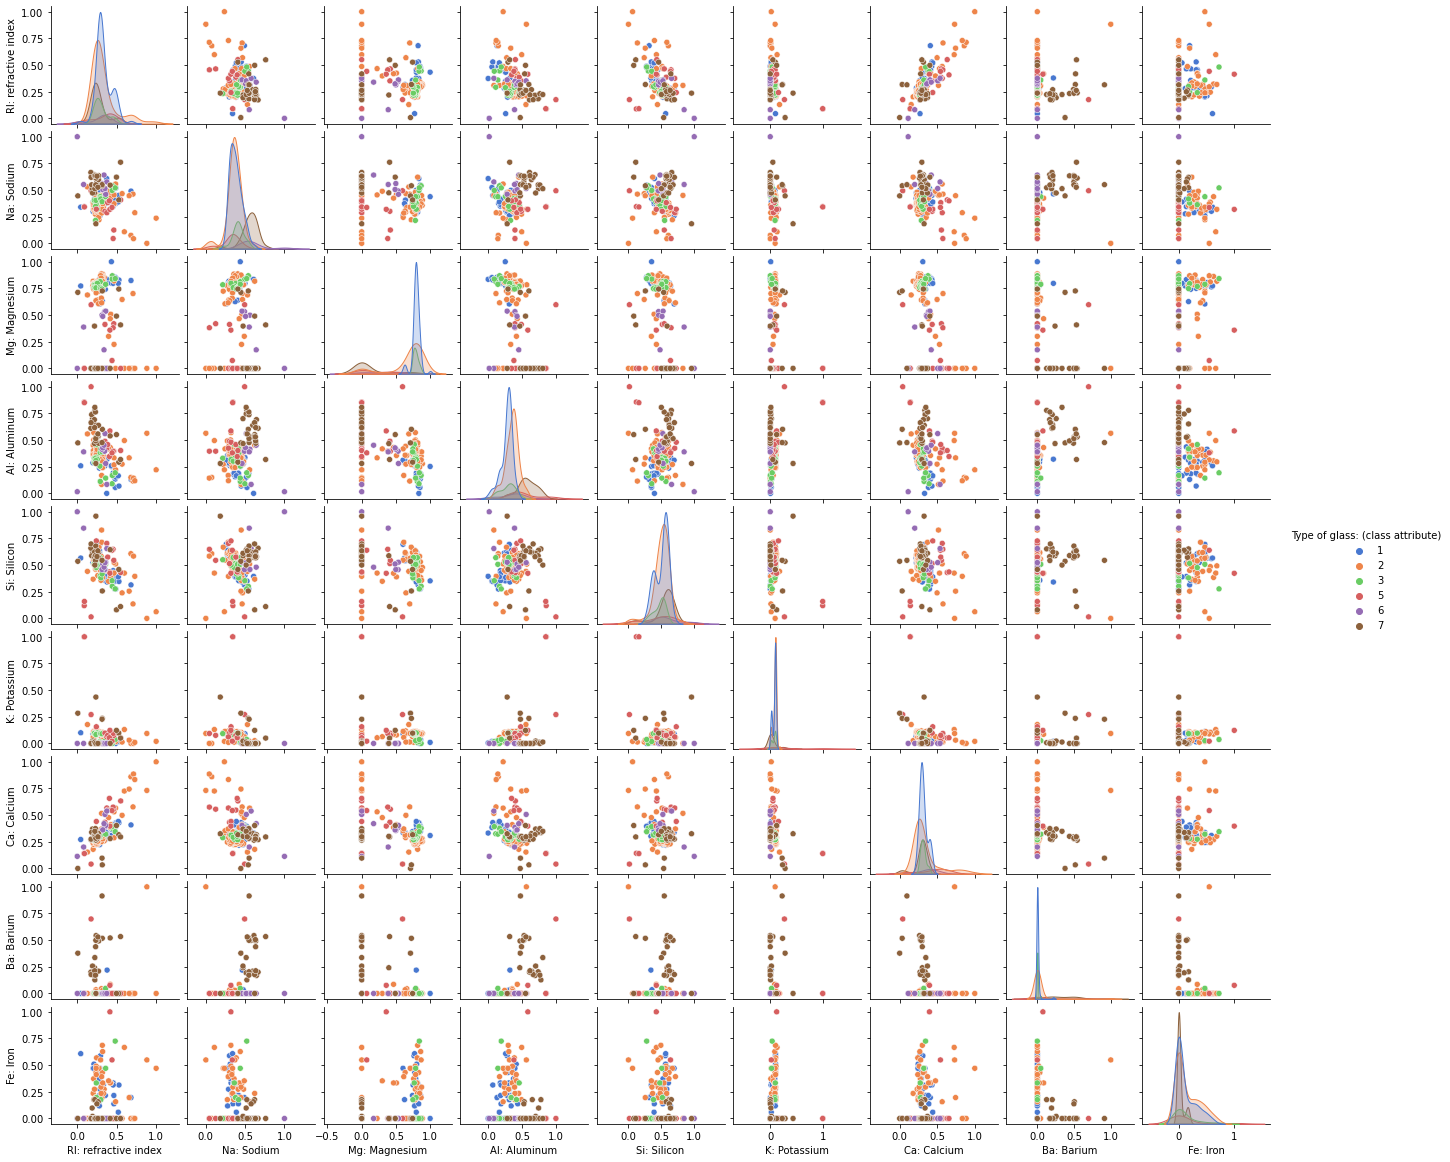

In [26]:
paru_graf=sns.pairplot(dk, hue="Type of glass: (class attribute)", palette="muted",height=2, vars =['RI: refractive index',
                                                                                                     'Na: Sodium',
                                                                                                       'Mg: Magnesium',
                                                                                                       'Al: Aluminum',
                                                                                                       'Si: Silicon',
                                                                                                       'K: Potassium',
                                                                                                       'Ca: Calcium',
                                                                                                       'Ba: Barium',
                                                                                                       'Fe: Iron'])
plt.subplots_adjust(top=0.9)

<AxesSubplot:>

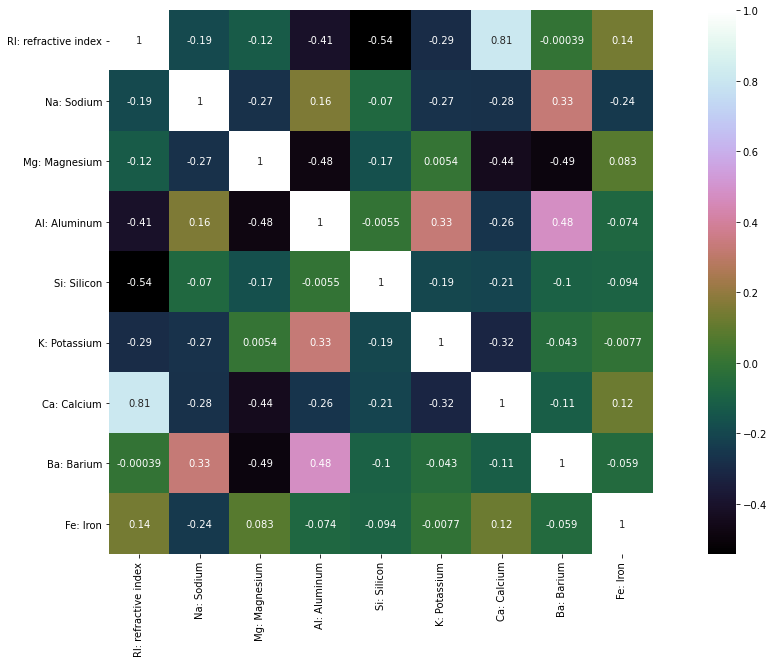

In [27]:
kor_matr = dk_viz.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(kor_matr, vmax=1,square=True,annot=True,cmap='cubehelix')

  

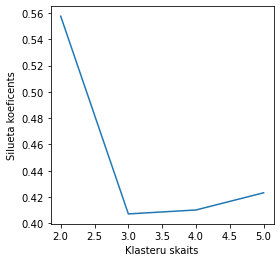

In [37]:
from sklearn.cluster import KMeans
from sklearn import metrics

dk_klaster_7p=dk[["Na: Sodium","Mg: Magnesium","Si: Silicon","K: Potassium", "Ca: Calcium","Ba: Barium","Fe: Iron"]]
Silueta_koef=[]
for i in range (2,6):
    kmean_model=KMeans(n_clusters=i,init="k-means++")
    kmean_model.fit(dk_klaster_7p)
    Silueta_koef.append(metrics.silhouette_score(dk_klaster_7p,kmean_model.labels_))
plt.figure(figsize=(4,4))
plt.plot(range(2,6),Silueta_koef)
plt.xlabel('Klasteru skaits')
plt.ylabel('Silueta koeficents')
plt.show()


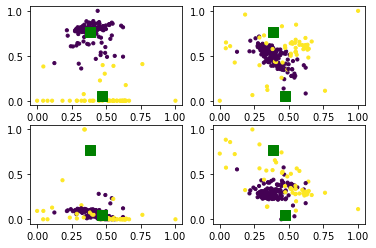

In [59]:
import matplotlib.pyplot as plt
kmean_model = KMeans(n_clusters=2,init="k-means++").fit(dk_klaster_7p)
centroids = kmean_model.cluster_centers_
ypred = kmean_model.predict(dk_klaster_7p)
plt.subplot(2,2,1)
plt.scatter(dk_klaster_7p["Na: Sodium"], dk_klaster_7p["Mg: Magnesium"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,2)
plt.scatter(dk_klaster_7p["Na: Sodium"], dk_klaster_7p["Si: Silicon"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,3)
plt.scatter(dk_klaster_7p["Na: Sodium"], dk_klaster_7p["K: Potassium"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,4)
plt.scatter(dk_klaster_7p["Na: Sodium"], dk_klaster_7p["Ca: Calcium"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')



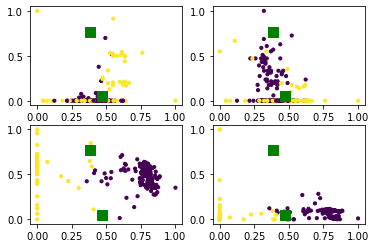

In [54]:
plt.subplot(2,2,1)
plt.scatter(dk_klaster_7p["Na: Sodium"], dk_klaster_7p["Ba: Barium"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,2)
plt.scatter(dk_klaster_7p["Na: Sodium"], dk_klaster_7p["Fe: Iron"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,3)
plt.scatter(dk_klaster_7p["Mg: Magnesium"], dk_klaster_7p["Si: Silicon"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,4)
plt.scatter(dk_klaster_7p["Mg: Magnesium"], dk_klaster_7p["K: Potassium"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')


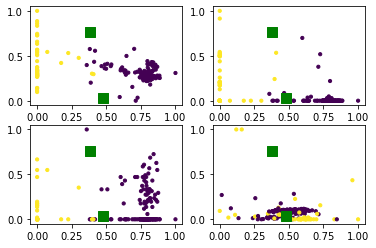

In [48]:
plt.subplot(2,2,1)
plt.scatter(dk_klaster_7p["Mg: Magnesium"], dk_klaster_7p["Ca: Calcium"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,2)
plt.scatter(dk_klaster_7p["Mg: Magnesium"], dk_klaster_7p["Ba: Barium"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,3)
plt.scatter(dk_klaster_7p["Mg: Magnesium"], dk_klaster_7p["Fe: Iron"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,4)
plt.scatter(dk_klaster_7p["Si: Silicon"], dk_klaster_7p["K: Potassium"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')


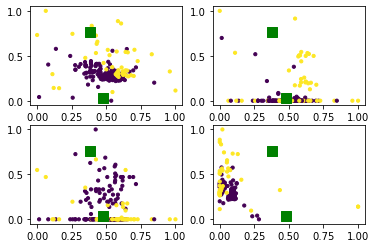

In [50]:
plt.subplot(2,2,1)
plt.scatter(dk_klaster_7p["Si: Silicon"], dk_klaster_7p["Ca: Calcium"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,2)
plt.scatter(dk_klaster_7p["Si: Silicon"], dk_klaster_7p["Ba: Barium"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,3)
plt.scatter(dk_klaster_7p["Si: Silicon"], dk_klaster_7p["Fe: Iron"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,4)
plt.scatter(dk_klaster_7p["K: Potassium"], dk_klaster_7p["Ca: Calcium"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')

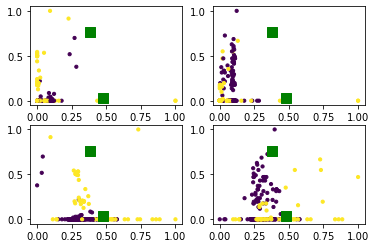

In [51]:
plt.subplot(2,2,1)
plt.scatter(dk_klaster_7p["K: Potassium"], dk_klaster_7p["Ba: Barium"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,2)
plt.scatter(dk_klaster_7p["K: Potassium"], dk_klaster_7p["Fe: Iron"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,3)
plt.scatter(dk_klaster_7p["Ca: Calcium"], dk_klaster_7p["Ba: Barium"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')
plt.subplot(2,2,4)
plt.scatter(dk_klaster_7p["Ca: Calcium"], dk_klaster_7p["Fe: Iron"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')

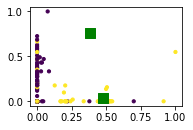

In [52]:

plt.subplot(2,2,1)
plt.scatter(dk_klaster_7p["Ba: Barium"], dk_klaster_7p["Fe: Iron"], s=10, c=ypred)
plt.scatter(centroids[0,0],centroids[0,1], s=100,c='g',marker='s')
plt.scatter(centroids[1,0],centroids[1,1], s=100,c='g',marker='s')

In [55]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(dk_klaster_7p)

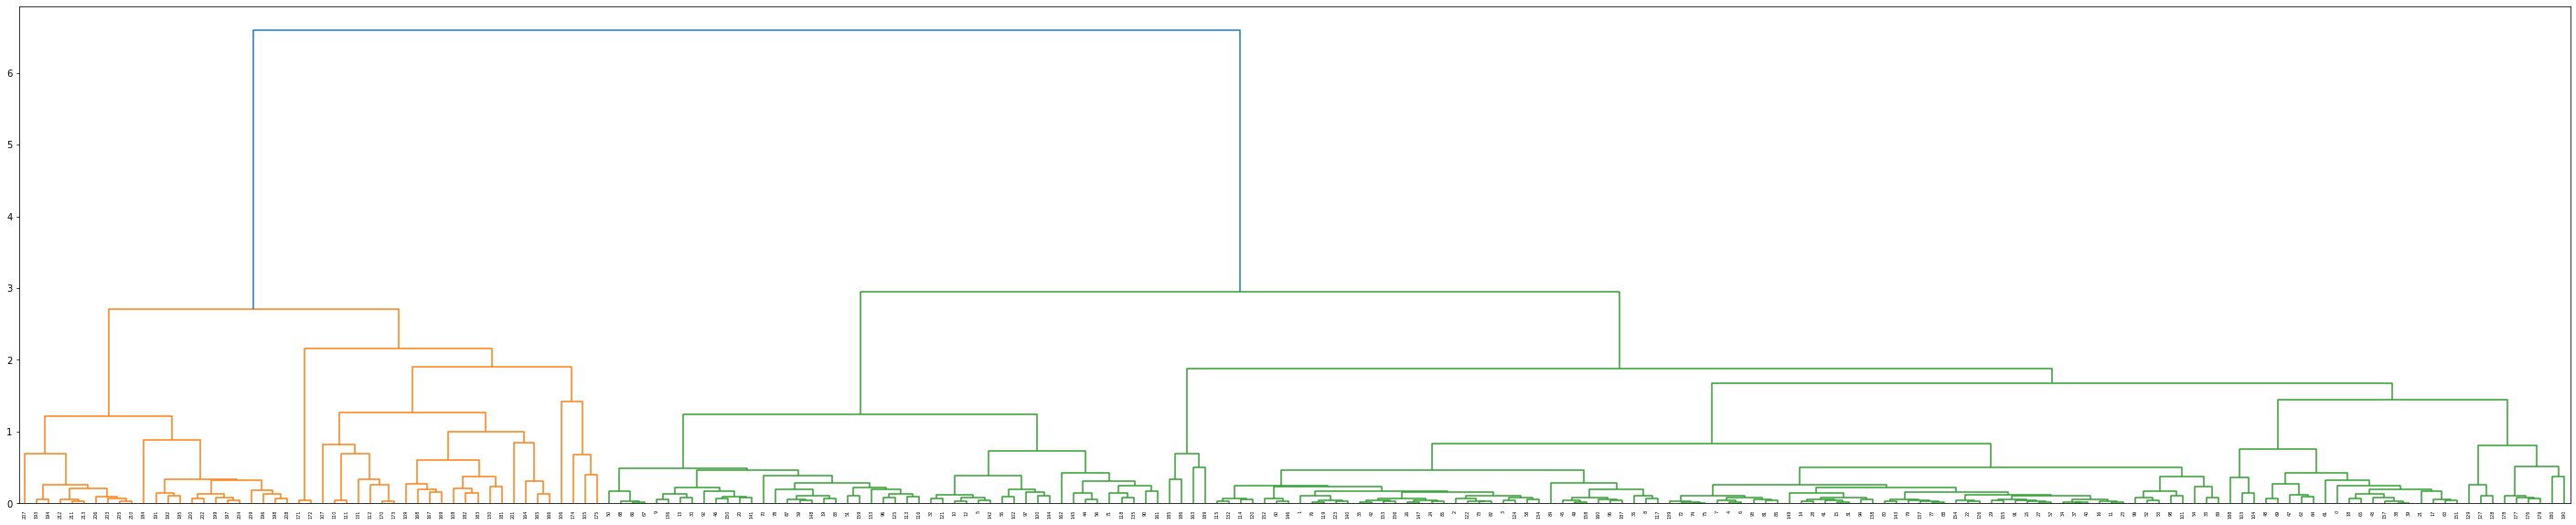

In [57]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(50,10))
Dendrogram=shc.dendrogram((shc.linkage(dk_klaster_7p, method = 'ward')))